In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import feature_selection
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%precision 2

pd.set_option('max_columns',200)

print(pd.__name__, pd.__version__)
print(plt.__name__, np.__version__)
print(np.__name__, np.__version__)
print(sns.__name__, np.__version__)
print(sklearn.__name__, sklearn.__version__)

pandas 1.3.5
matplotlib.pyplot 1.21.6
numpy 1.21.6
seaborn 1.21.6
sklearn 1.0.2


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if file_path == '/kaggle/input/life-expectancy-who/Life Expectancy Data.csv':
            df = pd.read_csv(file_path)
            if 'Unnamed: 0' in df.columns:
                df = df.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Change Developed/Developing to Dummy Variables 

df3 = pd.get_dummies(df, prefix=None)
df3.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,...,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Niue,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0

In [9]:
#Functions
def distributions(varname, longname, data): 
    """Plots the distributions of variable faceted by country status."""
    df = data
    fig = plt.figure(figsize = (10,4))
    title = fig.suptitle(longname, fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(1,2, 1)
    ax1.set_title("Developed Countries")
    freq1, bins1, patches1 = ax1.hist(data.loc[data['Status']=='Developed'][varname], bins=15, edgecolor='white', linewidth=1)

    ax2 = fig.add_subplot(1,2, 2)
    ax2.set_title("Developing Countries")
    freq2, bins2, patches2 = ax2.hist(data.loc[data['Status']=='Developing'][varname], bins=15, edgecolor='white', linewidth=1)
    plt.show()
    return

In [10]:
def runModel(varname, data, model): 
    """Prints results of regression model and returns X and y data sets."""
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('R2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test))
    
    plt.scatter(pred_test, (y_test - pred_test))
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()    
    
    return X, y

In [11]:
def runRegularizationModel(varname, data, model): 
    """Prints results and coefficients of regularlized regression model and returns X and y data sets."""
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    
    countIV = 0  
    
    for coef in mdl.coef_:
        if coef != 0:
            countIV += 1
    
    print('R2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test), '\n')
    print(list(zip(mdl.coef_, X_train.columns)))
    print('There are ' + str(countIV) + ' independent variables in the model.', '\n')
    print('______________________________________________________')
    
    plt.scatter(pred_test, (y_test - pred_test))
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    return X, y

In [12]:
def predictors(p, X, y, longname):
    "Returns the most informative predictors and their weights."

    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=p)
    X_train_fs = fs.fit_transform(X, np.ravel(y))

    predictors = pd.DataFrame(columns = ['Variable', 'Score'])

    for i in range(len(X.columns.values)):
        predictors = predictors.append({'Variable' : X.columns.values[i], 'Score' : round(fs.scores_[i],3)}, ignore_index = True)

    return predictors.sort_values(by=['Score'], ascending=False)

In [13]:
#Predicting Life Expectancy
# Dropped one of the two dummy levels for regression Analsyis.
df3 = df3.drop(columns=['Status_Developing'], axis=1)

In [14]:
varname = 'Life expectancy '
longname = 'Life Expectancy by Country Type'

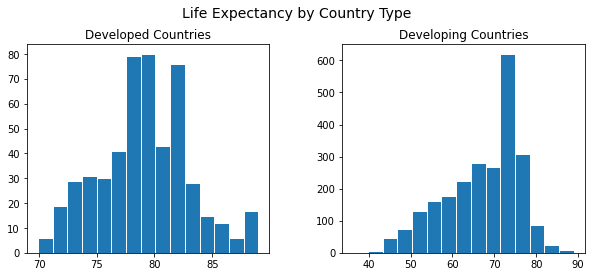

In [15]:
distributions(varname, longname, df)

In [16]:
"""
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, df3, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

"""

'\n# Using user defined function to run model linear regression and print results. \n\nX, y = runModel(varname, df3, LinearRegression())\n\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\nvif\n\n'

In [17]:
"""
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, df3, LinearRegression())

import pandas as pd
import numpy as np

# fill missing values with mean
X.fillna(X.mean(), inplace=True)
vif = pd.DataFrame()

def clean_dataset(vif):
    assert isinstance(vif, pd.DataFrame), "df needs to be a pd.DataFrame"
    vif.fillna(inplace=True)
    indices_to_keep = ~vif.isin([np.nan, np.inf, -np.inf]).any(1)
    return vif[indices_to_keep].astype(np.float64)

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

"""

'\n# Using user defined function to run model linear regression and print results. \n\nX, y = runModel(varname, df3, LinearRegression())\n\nimport pandas as pd\nimport numpy as np\n\n# fill missing values with mean\nX.fillna(X.mean(), inplace=True)\nvif = pd.DataFrame()\n\ndef clean_dataset(vif):\n    assert isinstance(vif, pd.DataFrame), "df needs to be a pd.DataFrame"\n    vif.fillna(inplace=True)\n    indices_to_keep = ~vif.isin([np.nan, np.inf, -np.inf]).any(1)\n    return vif[indices_to_keep].astype(np.float64)\n\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\nvif\n\n'

In [18]:
""""
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())
original_X_columns = X.columns
X = pd.DataFrame(X, columns=original_X_columns)

# drop 'Year' column
X = X.drop('Year', axis=1)

# fill missing values with mean
X.fillna(X.mean(), inplace=True)
df = df.dropna()
df = df.dropna(subset=['column1', 'column2'])

# replace NaN values with mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# initialize vif DataFrame
vif = pd.DataFrame()

# add 'VIF Factor' column
if X.isna().sum().sum() > 0:
    # fill missing values with mean
    X.fillna(X.mean(), inplace=True)
else:
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# handle divide by zero errors by replacing inf values with 0
vif.replace([np.inf, -np.inf], 0, inplace=True)

# add 'features' column
vif["features"] = X.columns

# drop rows with missing values
vif.dropna(inplace=True)

# drop 'Year' column from vif DataFrame
vif = vif[vif["features"] != 'Year']
vif
"""

'"\nimport pandas as pd\nfrom sklearn.linear_model import LinearRegression\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\noriginal_X_columns = X.columns\nX = pd.DataFrame(X, columns=original_X_columns)\n\n# drop \'Year\' column\nX = X.drop(\'Year\', axis=1)\n\n# fill missing values with mean\nX.fillna(X.mean(), inplace=True)\ndf = df.dropna()\ndf = df.dropna(subset=[\'column1\', \'column2\'])\n\n# replace NaN values with mean\nX = X.fillna(X.mean())\ny = y.fillna(y.mean())\n\n# initialize vif DataFrame\nvif = pd.DataFrame()\n\n# add \'VIF Factor\' column\nif X.isna().sum().sum() > 0:\n    # fill missing values with mean\n    X.fillna(X.mean(), inplace=True)\nelse:\n    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n# handle divide by zero errors by replacing inf values with 0\nvif.replace([np.inf, -np.inf], 0, inplace=True)\n\

R2 on Training: 0.9663490968022244
R2 on Test:     0.953974061709697 

Difference:  0.012375035092527353 

RMSE on Training: 3.00771533039383
RMSE on Test:     4.282776651857365


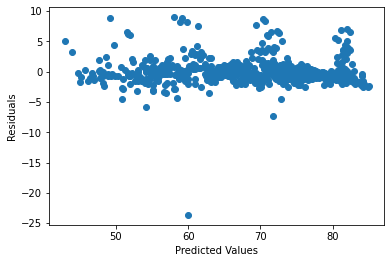

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.586451e+00,Adult Mortality
1,1.429003e+03,infant deaths
2,6.674650e+00,Alcohol
3,7.975933e+00,percentage expenditure
4,1.770329e+00,Hepatitis B
...,...,...
207,2.482061e+00,Country_Viet Nam
208,2.052747e+00,Country_Yemen
209,2.140563e+00,Country_Zambia
210,2.459988e+00,Country_Zimbabwe


In [19]:
#Entire Data -- both developed and developing
#Linear Regression with all features
# Using user defined function to run model linear regression and print results.


import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

#fit the linear regression model

# drop rows with missing values
#df.dropna(inplace=True)

# fill missing values with mean
df3.fillna(df3.mean(), inplace=True)

# change data types of columns
#df3[['column1', 'column2']] = df3[['column1', 'column2']].astype(int)

X, y = runModel(varname, df3, LinearRegression())
original_X_columns = X.columns
X = pd.DataFrame(X, columns=original_X_columns)
X = X.drop('Year', axis=1)

#drop 'Year' column

#X = X.drop('Year', axis=1)

#fill missing values with mean
# replace NaN values with mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X.fillna(X.mean(), inplace=True)

#initialize vif DataFrame

vif = pd.DataFrame()

# drop any row with NaN values in 'VIF Factor' column
vif.dropna(inplace=True)
vif.reset_index(drop=True, inplace=True)

X.replace([np.inf, -np.inf], 0, inplace=True)

#add 'VIF Factor' column

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#handle divide by zero errors by replacing inf values with 0

vif.replace([np.inf, -np.inf], 0, inplace=True)

#add 'features' column

vif["features"] = X.columns

#drop rows with missing values

vif.dropna(inplace=True)
X.fillna(X.mean(), inplace=True)

#drop 'Year' column from vif DataFrame

#vif = vif[vif["features"] != 'Year']

vif

In [20]:

"""
import statsmodels

# check for missing values
missing_rows = df3.isnull().sum(axis=1) > 0

# drop rows with missing values
df3 = df3[~missing_rows]

# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())

X = X.drop('Year', axis=1)

# fill missing values with mean
X.fillna(X.mean(), inplace=True)

# calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)
vif = vif[~vif['VIF Factor'].isna()]
pd.options.display.float_format = '{:,.2f}'.format

#Create a boolean mask that indicates which rows in X do not contain missing values

valid_rows = ~X.isna().any(axis=1)

#Use the boolean mask to filter the vif DataFrame

vif = vif[valid_rows]

#Update the 'features' column in vif DataFrame

vif["features"] = X[valid_rows].columns

#Perform the remaining operations on vif DataFrame

vif.reset_index(drop=True, inplace=True)
vif.drop(vif[vif['features'] == 'Year'].index, inplace=True)
vif.dropna(inplace=True)
vif = vif[vif["features"] != 'Year']
vif = vif[~vif['VIF Factor'].isna()]
vif
"""

'\nimport statsmodels\n\n# check for missing values\nmissing_rows = df3.isnull().sum(axis=1) > 0\n\n# drop rows with missing values\ndf3 = df3[~missing_rows]\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\n\nX = X.drop(\'Year\', axis=1)\n\n# fill missing values with mean\nX.fillna(X.mean(), inplace=True)\n\n# calculate VIF\nvif = pd.DataFrame()\nvif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)\nvif = vif[~vif[\'VIF Factor\'].isna()]\npd.options.display.float_format = \'{:,.2f}\'.format\n\n#Create a boolean mask that indicates which rows in X do not contain missing values\n\nvalid_rows = ~X.isna().any(axis=1)\n\n#Use the boolean mask to filter the vif DataFrame\n\nvif = vif[valid_rows]\n\n#Update the \'features\' column in vif DataFrame\n\nvif["features"] = X[valid_rows].columns\n\n#Perform the remaining operat

In [21]:
"""
#Entire Data -- both developed and developing
#Linear Regression with all features
# Using user defined function to run model linear regression and print results.

import statsmodels

# check for missing values
df3.isnull().sum()
# fill missing values with mean
X.fillna(X.mean(), inplace=True)


# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())

X = X.drop('Year', axis=1)

# calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)
vif = vif[~vif['VIF Factor'].isna()]
pd.options.display.float_format = '{:,.2f}'.format

# Ensure that the number of rows of vif is the same as the number of columns of X
if X.shape[1] != vif.shape[0]:
    vif = vif[:X.shape[1]]

vif["features"] = X.columns

# drop rows with 'Year' in features
vif.drop(vif[vif['features'] == 'Year'].index, inplace=True)

# drop any row with NaN values in 'VIF Factor' column
vif.dropna(inplace=True)

# remove independent variables with VIF of infinity
vif = vif[vif['VIF Factor'] != np.inf]

# Drop variables with high VIF
X = X.drop(vif[vif['VIF Factor'] == np.inf]['features'], axis=1)


vif

"""

'\n#Entire Data -- both developed and developing\n#Linear Regression with all features\n# Using user defined function to run model linear regression and print results.\n\nimport statsmodels\n\n# check for missing values\ndf3.isnull().sum()\n# fill missing values with mean\nX.fillna(X.mean(), inplace=True)\n\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\n\nX = X.drop(\'Year\', axis=1)\n\n# calculate VIF\nvif = pd.DataFrame()\nvif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)\nvif = vif[~vif[\'VIF Factor\'].isna()]\npd.options.display.float_format = \'{:,.2f}\'.format\n\n# Ensure that the number of rows of vif is the same as the number of columns of X\nif X.shape[1] != vif.shape[0]:\n    vif = vif[:X.shape[1]]\n\nvif["features"] = X.columns\n\n# drop rows with \'Year\' in features\nvif.drop(vif[vif[\'features\']

In [22]:
"""
import statsmodels

# check for missing values
df3.isnull().sum()

# drop missing values
df3.dropna(inplace=True)

# fill missing values with mean
df3.fillna(df.mean(), inplace=True)

# change data types of columns
#df3[['column1', 'column2']] = df3[['column1', 'column2']].astype(int)

# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())

X = X.drop('Year', axis=1)

# check for columns with all NaN values
cols_with_all_nans = X.columns[X.isnull().all()]

# drop columns with all NaN values
X.drop(cols_with_all_nans, axis=1, inplace=True)

# check for rows with missing values
rows_with_missing_values = X.index[X.isnull().any(axis=1)]

# drop rows with missing values
X.drop(rows_with_missing_values, axis=0, inplace=True)


# calculate VIF
vif = pd.DataFrame()

vif.index = X.columns
vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)
vif = vif[~vif['VIF Factor'].isna()]
pd.options.display.float_format = '{:,.2f}'.format

# drop any row with NaN values in 'VIF Factor' column
vif.dropna(inplace=True)
vif.reset_index(drop=True, inplace=True)

vif["features"] = X.columns
# remove independent variables with VIF of infinity
vif = vif[vif['VIF Factor'] != np.inf]
X = X.drop(vif[vif['VIF Factor'] == np.inf]['features'], axis=1)
vif["features"] = X.columns

vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif
vif

"""

'\nimport statsmodels\n\n# check for missing values\ndf3.isnull().sum()\n\n# drop missing values\ndf3.dropna(inplace=True)\n\n# fill missing values with mean\ndf3.fillna(df.mean(), inplace=True)\n\n# change data types of columns\n#df3[[\'column1\', \'column2\']] = df3[[\'column1\', \'column2\']].astype(int)\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\n\nX = X.drop(\'Year\', axis=1)\n\n# check for columns with all NaN values\ncols_with_all_nans = X.columns[X.isnull().all()]\n\n# drop columns with all NaN values\nX.drop(cols_with_all_nans, axis=1, inplace=True)\n\n# check for rows with missing values\nrows_with_missing_values = X.index[X.isnull().any(axis=1)]\n\n# drop rows with missing values\nX.drop(rows_with_missing_values, axis=0, inplace=True)\n\n\n# calculate VIF\nvif = pd.DataFrame()\n\nvif.index = X.columns\nvif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif[

In [23]:
"""
import statsmodels

# check for missing values
print(df3.isnull().sum())

# drop columns with all NaN values
df3 = df3.dropna(axis=1, how='all')

# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())

X = X.drop('Year', axis=1)

# check for rows with missing values
rows_with_missing_values = X.index[X.isnull().any(axis=1)]

# drop rows with missing values
X.drop(rows_with_missing_values, axis=0, inplace=True)

# calculate VIF
# calculate VIF
vif = pd.DataFrame()
valid_rows = X.notna().all(axis=1)
valid_rows["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X[valid_rows].values, i) for i in range(X[valid_rows].shape[1])]
valid_rows["VIF Factor"] = np.around(valid_rows["VIF Factor"], decimals=2)
valid_rows = valid_rows[~valid_rows['VIF Factor'].isna()]
pd.options.display.float_format = '{:,.2f}'.format

# drop any row with NaN values in 'VIF Factor' column
valid_rows.dropna(inplace=True)
valid_rows.reset_index(drop=True, inplace=True)

valid_rows["features"] = X.columns
# remove independent variables with VIF of infinity
valid_rows = valid_rows[valid_rows['VIF Factor'] != np.inf]
X.drop(valid_rows[valid_rows['VIF Factor'] == np.inf]['features'], axis=1)
valid_rows["features"] = X.columns

valid_rows["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
valid_rows
valid_rows

"""

'\nimport statsmodels\n\n# check for missing values\nprint(df3.isnull().sum())\n\n# drop columns with all NaN values\ndf3 = df3.dropna(axis=1, how=\'all\')\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\n\nX = X.drop(\'Year\', axis=1)\n\n# check for rows with missing values\nrows_with_missing_values = X.index[X.isnull().any(axis=1)]\n\n# drop rows with missing values\nX.drop(rows_with_missing_values, axis=0, inplace=True)\n\n# calculate VIF\n# calculate VIF\nvif = pd.DataFrame()\nvalid_rows = X.notna().all(axis=1)\nvalid_rows["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X[valid_rows].values, i) for i in range(X[valid_rows].shape[1])]\nvalid_rows["VIF Factor"] = np.around(valid_rows["VIF Factor"], decimals=2)\nvalid_rows = valid_rows[~valid_rows[\'VIF Factor\'].isna()]\npd.options.display.float_format = \'{:,.2f}\'.format\n\n# drop any row with NaN values in \'VIF Factor\' column\nvalid_rows.dropna(inplace=True)

In [24]:
"""
import statsmodels

# check for missing values
print(df3.isnull().sum())

# drop columns with all NaN values
df3 = df3.dropna(axis=1, how='all')

# fit the linear regression model
X, y = runModel(varname, df3, LinearRegression())

X = X.drop('Year', axis=1)

# check for rows with missing values
rows_with_missing_values = X.index[X.isnull().any(axis=1)]

# drop rows with missing values
X.drop(rows_with_missing_values, axis=0, inplace=True)

# calculate VIF
valid_rows = np.where(np.logical_not(np.isnan(X.values).any(axis=1)))[0]
vif = pd.DataFrame()
vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.iloc[valid_rows].values, i) for i in range(X.iloc[valid_rows].shape[1])]
vif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)

pd.options.display.float_format = '{:,.2f}'.format

# drop any row with NaN values in 'VIF Factor' column
vif.dropna(inplace=True)
vif.reset_index(drop=True, inplace=True)

vif["features"] = X.columns
# remove independent variables with VIF of infinity
vif = vif[vif['VIF Factor'] != np.inf]
X = X.drop(vif[vif['VIF Factor'] == np.inf]['features'], axis=1)
vif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

"""

'\nimport statsmodels\n\n# check for missing values\nprint(df3.isnull().sum())\n\n# drop columns with all NaN values\ndf3 = df3.dropna(axis=1, how=\'all\')\n\n# fit the linear regression model\nX, y = runModel(varname, df3, LinearRegression())\n\nX = X.drop(\'Year\', axis=1)\n\n# check for rows with missing values\nrows_with_missing_values = X.index[X.isnull().any(axis=1)]\n\n# drop rows with missing values\nX.drop(rows_with_missing_values, axis=0, inplace=True)\n\n# calculate VIF\nvalid_rows = np.where(np.logical_not(np.isnan(X.values).any(axis=1)))[0]\nvif = pd.DataFrame()\nvif["VIF Factor"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(X.iloc[valid_rows].values, i) for i in range(X.iloc[valid_rows].shape[1])]\nvif["VIF Factor"] = np.around(vif["VIF Factor"], decimals=2)\n\npd.options.display.float_format = \'{:,.2f}\'.format\n\n# drop any row with NaN values in \'VIF Factor\' column\nvif.dropna(inplace=True)\nvif.reset_index(drop=True, inplace=True)\n\nvif["featu

In [25]:
# Best predictors using the SelectPercentile method.
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds

Best predictors of Life Expectancy by Country Type 



,Variable,Score
17,Schooling,3072.020
0,Adult Mortality,2764.044
16,Income composition of resources,2705.082
6,BMI,1336.201
11,HIV/AIDS,1316.879
...,...,...
34,Country_Belize,0.000
63,Country_Democratic People's Republic of Korea,0.000
123,Country_Marshall Islands,0.000
56,Country_Cook Islands,0.000


In [26]:
#A significant number of variables have variance inflation factors over 10 indiciting the model with all the variables suffer from multicollinearity. 
#Ridge Regression will be tested along with Lasso regression to help determine the independent variables to select.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create the pipeline object
pipeline = make_pipeline(StandardScaler(), Ridge())

# Set the alpha parameter
alphas = np.linspace(.01,5,5)

def runRegularizationModel(varname, data, model):
    X = data.drop(varname, axis=1)
    y = data[varname]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    countIV = 0
    for coef in model.named_steps['ridge'].coef_:
        if coef != 0:
            countIV += 1

    return X, y

# After tuning, selected the best alpha to run model on.
for a in alphas:
    print('The alpha value is ', a)
    pipeline.set_params(ridge__alpha=a)
    X, y = runRegularizationModel(varname, df3, pipeline)

The alpha value is  0.01
The alpha value is  1.2575
The alpha value is  2.505
The alpha value is  3.7525
The alpha value is  5.0


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Create the pipeline object
pipeline = make_pipeline(StandardScaler(), Ridge())

# Set the alpha parameter
alphas = np.linspace(.01,5,5)

# After tuning, selected the best alpha to run model on.
for a in alphas:
    print('The alpha value is ', a)
    pipeline.set_params(ridge__alpha=a)
    X, y = runRegularizationModel(varname, df3, pipeline)
    print(df3)

The alpha value is  0.01
      Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
2933  2004              44.3            723.0             27     4.36   
2934  2003              44.5            715.0             26     4.06   
2935  2002              44.8             73.0             25     4.43   
2936  2001              45.3            686.0             25     1.72   
2937  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624        

In [29]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,13,50) 

from sklearn.linear_model import RidgeCV
alphas = np.linspace(2.66,2.93,1000)

def runRegularizationModel(varname, data, model):
    X = data.drop(varname, axis=1)
    y = data[varname]
    model.fit(X, y)

    countIV = 0
    if isinstance(model, RidgeCV):
        for coef in model.coef_:
            if coef != 0:
                countIV += 1
    elif isinstance(model, Lasso):
        for coef in model.coef_:
            if coef != 0:
                countIV += 1
    
    return X, y

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create the pipeline object
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))

# Run the regularization model
X, y = runRegularizationModel(varname, df3, pipeline)

# After tuning, selected the best alpha to run model on.
for a in [2.75]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3, Lasso(alpha=a, max_iter=10000))


The alpha value is  2.75


In [30]:
# Re-run ridge regression with Lasso selected variables

lassoVars = ['Alcohol', 'Measles ', ' BMI ', 'under-five deaths ', 'GDP', 'Population', 'Adult Mortality', 'Polio', 'Life expectancy '] 
df3LassoVars = df3[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3LassoVars, Ridge(alpha=a, normalize=True))

The alpha value is  0.14


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [31]:
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Income composition of resources', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
df3BestVars = df3[bestVars]

y = df3BestVars['Life expectancy ']
X = df3BestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1798.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:30:43   Log-Likelihood:                -6709.9
No. Observations:                2203   AIC:                         1.343e+04
Df Residuals:                    2199   BIC:                         1.345e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,28.521699,Income composition of resources
1,30.443878,Schooling
2,1.989166,Adult Mortality


In [32]:
# Using user defined function to run model ridge regression with best variables selected by the SelectPercentile method. 

# Tune alpha values
alphas = np.linspace(0.01,.3,3) 

# After tuning, selected the best alpha to run model on.
for a in [.1]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3BestVars, Ridge(alpha=a, normalize=True))

The alpha value is  0.1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [33]:
#Random Forest Regression

R2 on Training: 0.9946859498467545
R2 on Test:     0.9597854424026232 

Difference:  0.03490050744413131 

RMSE on Training: 0.4749694241031392
RMSE on Test:     3.7420197119393657


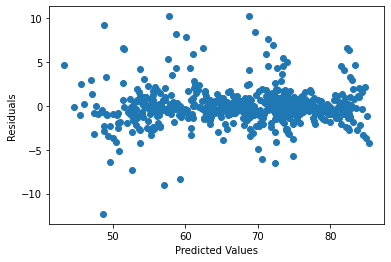

In [34]:
X, y = runModel(varname, df3, RandomForestRegressor(random_state=210))

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Scale the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Perform grid search in parallel
param_grid = {'max_depth': np.arange(2,7), 'min_samples_split': np.arange(5,30,5), 'criterion': ['squared_error','mae']}
grid = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=multiprocessing.cpu_count())
grid.fit(data_scaled, y)

print(grid.best_params_)

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 5}


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R2 on Training: 0.9562858278980507
R2 on Test:     0.9327054019007921 

Difference:  0.023580425997258625 

RMSE on Training: 3.907169588101811
RMSE on Test:     6.261854602888873


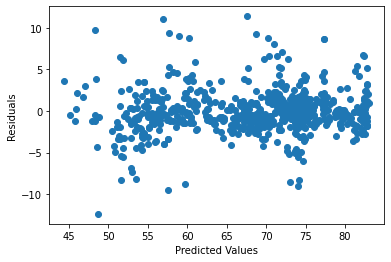

In [189]:
X, y = runModel(varname, df3, RandomForestRegressor(max_depth = 6, min_samples_split = 10, criterion = 'mse', random_state=210))

In [96]:
#Developing vs Developed
# Create seperate data frames for developed and developing countries
dfDeveloping = df3.loc[df3['Status_Developed']==0]
dfDeveloped = df3.loc[df3['Status_Developed']==1]

dfDeveloping = dfDeveloping.drop(columns=['Status_Developed'],axis=1)
dfDeveloped = dfDeveloped.drop(columns=['Status_Developed'],axis=1)

In [97]:
dfDeveloping.describe()  # Obtain summary of variables for developing countries.

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,...,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Niue,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2.426000e+03,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.00000

In [ ]:
# Display heatmap for developing countries

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 7))
corr = dfDeveloping.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developing Countries', fontsize=14)
plt.show()

In [ ]:
dfDeveloped.describe()  # Obtain summary of variables for developed countries.

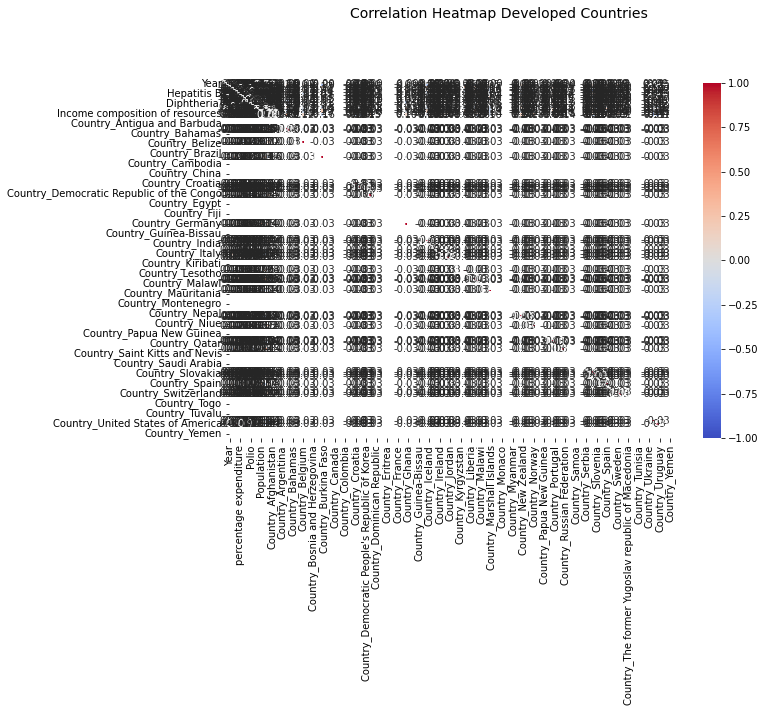

In [98]:
# Display heatmap for developed countries

f, ax = plt.subplots(figsize=(10, 7))
corr = dfDeveloped.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developed Countries', fontsize=14)
plt.show()

In [100]:
dfDeveloped[' HIV/AIDS'].unique()

array([0.1])

In [103]:
# Dropping HIV/AIDs per the previous discussion about possible error. 

df3Classify = df3.drop(columns = [' HIV/AIDS'], axis=1)

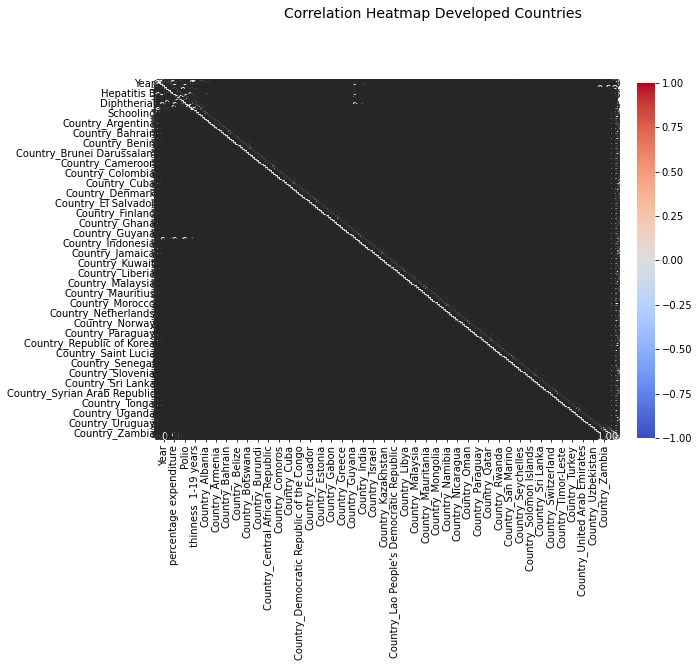

In [104]:
# Display heatmap for developed countries

f, ax = plt.subplots(figsize=(10, 7))
corr = df3Classify.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developed Countries', fontsize=14)
plt.show()

R2 on Training: 0.9605467728678511
R2 on Test:     0.9549410827525253 

Difference:  0.0056056901153257455 

RMSE on Training: 3.2259107923428973
RMSE on Test:     3.4844861521778454


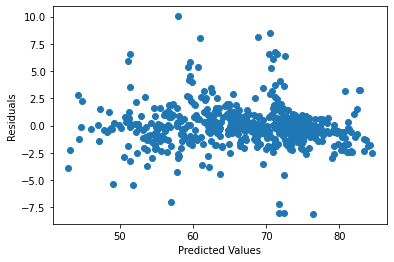

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
1,2.356976,Adult Mortality
2,1418.409862,infant deaths
3,5.180385,Alcohol
4,5.534796,percentage expenditure
5,1.838835,Hepatitis B
...,...,...
207,2436.591572,Country_Venezuela (Bolivarian Republic of)
208,2448.527935,Country_Viet Nam
209,2461.414232,Country_Yemen
210,2465.583404,Country_Zambia


In [105]:
#Developing data frame
#Linear Regression 
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, dfDeveloping, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
# drop 'Year' column from vif DataFrame
vif = vif[vif["features"] != 'Year']
vif

In [106]:
# Display best predictors for developing countries.
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Best predictors of Life Expectancy by Country Type 



,Variable,Score
1,Adult Mortality,1879.590
18,Schooling,1749.142
17,Income composition of resources,1443.851
12,HIV/AIDS,1170.998
7,BMI,1026.444
...,...,...
179,Country_Spain,NaN
184,Country_Sweden,NaN
185,Country_Switzerland,NaN
201,Country_United Kingdom of Great Britain and No...,NaN


In [107]:
# Using user defined function to run model ridge regression and print results. 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Tune alpha values
alphas = np.linspace(0.01,13,5) 

for a in alphas:
    model = make_pipeline(StandardScaler(), Ridge(alpha=a))
    X, y = runRegularizationModel(varname, dfDeveloping, model)
    

In [108]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,13,100) 
#alphas = np.linspace(6.56936,6.56939,1000)

# After tuning, selected the best alpha to run model on.
for a in [6.57]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDeveloping, Lasso(alpha=a, max_iter=10000))

The alpha value is  6.57


In [109]:
#Linear Regression with lasso selected features
lassoVars = ['Measles ', ' BMI ', 'under-five deaths ', 'GDP', 'Population', 'Adult Mortality', 'Polio', 'Life expectancy '] 
dfDevelopingLassoVars = dfDeveloping[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [0.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopingLassoVars, Ridge(alpha=a, normalize=True))

The alpha value is  0.14


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [110]:
#Linear Regression with SelectPercentile method selected features
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Income composition of resources', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
dfDevelopingBestVars = dfDeveloping[bestVars]

y = dfDevelopingBestVars['Life expectancy ']
X = dfDevelopingBestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1049.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        08:55:37   Log-Likelihood:                -5671.9
No. Observations:                1819   AIC:                         1.135e+04
Df Residuals:                    1815   BIC:                         1.137e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,21.736471,Income composition of resources
1,23.733905,Schooling
2,2.227768,Adult Mortality


In [111]:
# Using user defined function to run model ridge regression with best variables selected by the SelectPercentile method. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.1]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopingBestVars, Ridge(alpha=a, normalize=True))

The alpha value is  0.1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


R2 on Training: 0.9938233102224157
R2 on Test:     0.9683906699958922 

Difference:  0.025432640226523473 

RMSE on Training: 0.5050398069522368
RMSE on Test:     2.4444056672290797


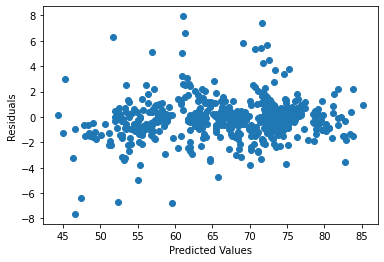

In [113]:
#Random Forest Regression
X, y = runModel(varname, dfDeveloping, RandomForestRegressor(random_state=210))


In [200]:
#Perform GridSearchCV to find optimal kernel-specific and regularization parameter values.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import multiprocessing

#Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform grid search in parallel

param_grid = {'max_depth': np.arange(2,7), 'min_samples_split': np.arange(5,30,5), 'criterion': ['squared_error','mae']}
grid = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=multiprocessing.cpu_count())
grid.fit(X_scaled, y)

print(grid.best_params_)

{'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 5}


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R2 on Training: 0.9504073449850048
R2 on Test:     0.9400219087410148 

Difference:  0.01038543624399002 

RMSE on Training: 4.054965655862627
RMSE on Test:     4.638212393745572


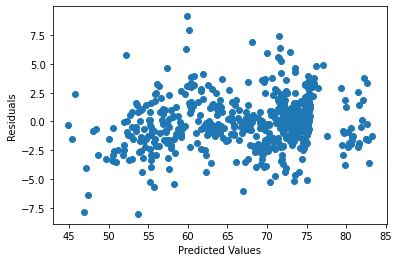

In [191]:
X, y = runModel(varname, dfDeveloping, RandomForestRegressor(max_depth = 6, min_samples_split = 10, criterion = 'mse', random_state=210))

R2 on Training: 0.7899366065238024
R2 on Test:     0.7161625319397866 

Difference:  0.07377407458401575 

RMSE on Training: 3.084885198468745
RMSE on Test:     4.984828315438351


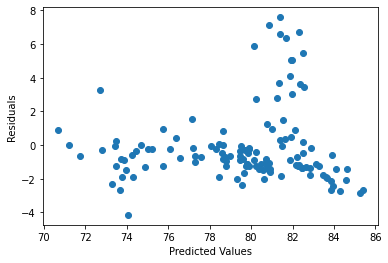

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


     VIF Factor                                    features
0      6.007811                                        Year
1      1.850977                             Adult Mortality
2    392.168007                               infant deaths
3      3.209029                                     Alcohol
4      9.059626                      percentage expenditure
..          ...                                         ...
207         NaN  Country_Venezuela (Bolivarian Republic of)
208         NaN                            Country_Viet Nam
209         NaN                               Country_Yemen
210         NaN                              Country_Zambia
211         NaN                            Country_Zimbabwe

[212 rows x 2 columns]
   VIF Factor                features
0    6.007811                    Year
1    1.850977         Adult Mortality
2  392.168007           infant deaths
3    3.209029                 Alcohol
4    9.059626  percentage expenditure
5    1.457269             He

In [190]:
#Developed 
#Linear Regression
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, dfDeveloped, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)
print(vif.head(10))


In [115]:
# Display best predictors for developed countries,
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds
print(preds.head(10))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Best predictors of Life Expectancy by Country Type 

                            Variable    Score
16                thinness 5-9 years  281.739
15              thinness  1-19 years  269.620
1                    Adult Mortality  157.277
17   Income composition of resources  147.591
13                               GDP   77.593
18                         Schooling   71.881
4             percentage expenditure   71.343
0                               Year   63.489
116                Country_Lithuania   47.651
43                  Country_Bulgaria   46.942


In [127]:
# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

# Define function to run regularization model
def runRegularizationModel(varname, data, model):
    X = data.drop(columns=[varname])
    y = data[varname]
    model.fit(X, y)
    return X, y

# Tune alpha values
alphas = np.linspace(0.01,1,3)
for a in alphas:
    model = make_pipeline(StandardScaler(), RidgeCV(alphas=[a], cv=5))
    X, y = runRegularizationModel(varname, dfDeveloped, model)
    print("Best alpha value:", model.named_steps['ridgecv'].alpha_)
    print("R-squared value:", model.score(X, y))

Best alpha value: 0.01
R-squared value: 0.7771842645970773
Best alpha value: 0.505
R-squared value: 0.776690677410893
Best alpha value: 1.0
R-squared value: 0.7759944060704561


In [128]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,20,100) 
alphas = np.linspace(0.62,.81,1000)

# After tuning, selected the best alpha to run model on.
for a in [.73]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDeveloped, Lasso(alpha=a, max_iter=10000))

The alpha value is  0.73


In [129]:
# Re-run ridge regression with Lasso selected variables

lassoVars = ['percentage expenditure', 'Hepatitis B', 'Measles ', 'GDP', 'Population', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
dfDevelopedLassoVars = dfDeveloped[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopedLassoVars, Ridge(alpha=a, normalize=True))

The alpha value is  0.14


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [121]:
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Adult Mortality', 'Income composition of resources', 'Life expectancy '] 
dfDevelopedBestVars = dfDeveloped[bestVars]

y = dfDevelopedBestVars['Life expectancy ']
X = dfDevelopedBestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.77e-38
Time:                        09:00:34   Log-Likelihood:                -973.59
No. Observations:                 384   AIC:                             1953.
Df Residuals:                     381   BIC:                             1965.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,3.443993,Adult Mortality
1,3.443993,Income composition of resources


R2 on Training: 0.36488978856018817
R2 on Test:     0.40866016957831697 

Difference:  -0.0437703810181288 

RMSE on Training: 9.32690869287053
RMSE on Test:     10.385265732807294


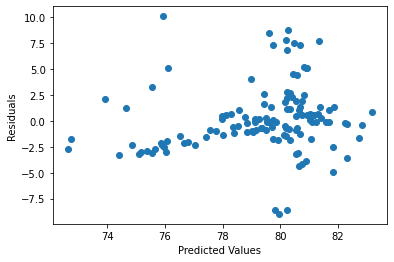

,VIF Factor,features
0,3.443993,Adult Mortality
1,3.443993,Income composition of resources


In [122]:
X, y = runModel(varname, dfDevelopedBestVars, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

R2 on Training: 0.9705156900250338
R2 on Test:     0.80045601660276 

Difference:  0.1700596734222738 

RMSE on Training: 0.4329917265625049
RMSE on Test:     3.5044439531249902


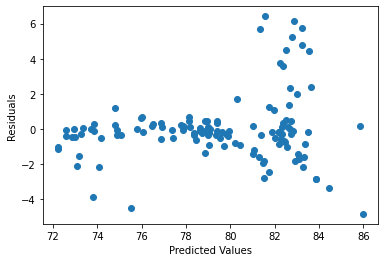

In [130]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(random_state=210))

In [ ]:
#Perform GridSearchCV to find optimal kernel-specific and regularization parameter values.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import multiprocessing

#Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform grid search in parallel

param_grid = {'max_depth': np.arange(2,7), 'min_samples_split': np.arange(5,30,5), 'criterion': ['squared_error','mae']}
grid = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=multiprocessing.cpu_count())
grid.fit(X_scaled, y)

print(grid.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R2 on Training: 0.8580698361025143
R2 on Test:     0.7632579827247268 

Difference:  0.09481185337778752 

RMSE on Training: 2.084314904077794
RMSE on Test:     4.1577256140032475


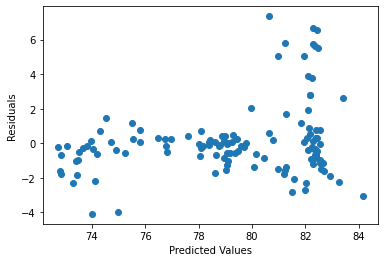

In [192]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(max_depth = 5, min_samples_split = 5, criterion = 'mse', random_state=210))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R2 on Training: 0.7562267114328547
R2 on Test:     0.708533033576382 

Difference:  0.047693677856472716 

RMSE on Training: 3.579931739834753
RMSE on Test:     5.118819573655263


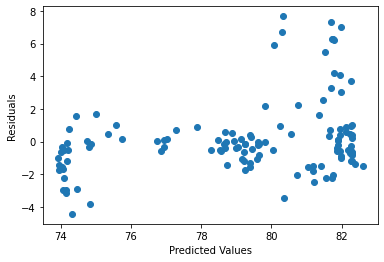

In [193]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(max_depth = 3, min_samples_split = 5, criterion = 'mse', random_state=210))

In [132]:
#PCA Test
#Use same split as before
y = df3['Life expectancy ']
X = df3.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [138]:
# Initialize PCA keeping all components 
pca = PCA(n_components=10)

# Fit and transform the feature sets
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

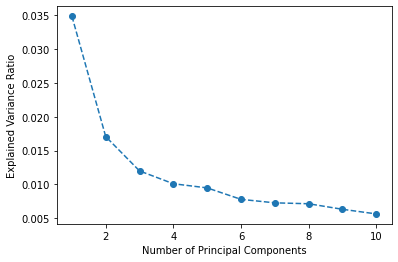

Cumulative explained variance ratio:  [0.03 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.11 0.12]


In [141]:
# Plot scree plot
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df3)

# Perform PCA
pca = PCA(n_components=10)
pca.fit(data_scaled)

# Plot scree plot
y = pca.explained_variance_ratio_
x = np.arange(1, len(y)+1)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.plot(x, y, marker='o', linestyle='dashed') 
plt.show()

# Print cummulative variance explained by componets
print("Cumulative explained variance ratio: ", pca.explained_variance_ratio_.cumsum().round(decimals=10))



In [143]:
# Rerun PCA analysis and transformations keeping only one components. 
pca = PCA(n_components=6)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

The R² on the training data is 0.57.
The R² on the validation data is 0.6.
The Root Mean Squared Error on the training data is 6.21.
The Root Mean Squared Error on the validation data is 6.07.


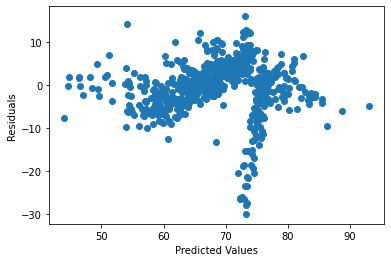

In [144]:
# Intialize and fit the linear regression model with standard PCA using 6 components.   
linReg = LinearRegression()
linReg.fit(X_train_pca, y_train)

# Make prediction and get performance measures for training data.
regPredTrain = linReg.predict(X_train_pca)
rSquaredTraining = metrics.r2_score(y_train, regPredTrain)
trainRSME = metrics.mean_squared_error(y_train, regPredTrain)**(1/2)

# Make prediction and get performance measures for validation data.
regPredVal = linReg.predict(X_test_pca)
rSquaredVal = metrics.r2_score(y_test, regPredVal)
valRSME = metrics.mean_squared_error(y_test, regPredVal)**(1/2)

# print results from preceding regression analysis.
print('The R\u00b2 on the training data is ' + str(round(rSquaredTraining, 2)) + '.')
print('The R\u00b2 on the validation data is ' + str(round(rSquaredVal, 2)) + '.')
print('The Root Mean Squared Error on the training data is ' + str(round(trainRSME, 2)) + '.')
print('The Root Mean Squared Error on the validation data is ' + str(round(valRSME, 2)) + '.')


plt.scatter(regPredVal, (y_test - regPredVal))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [147]:
#PCA Test Developed Country
#same split as before
y = dfDeveloped['Life expectancy ']
X = dfDeveloped.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [148]:
# Rerun PCA analysis and transformations keeping only one components. 
pca = PCA(n_components=7)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

The R² on the training data is 0.3.
The R² on the validation data is 0.31.
The Root Mean Squared Error on the training data is 3.2.
The Root Mean Squared Error on the validation data is 3.47.


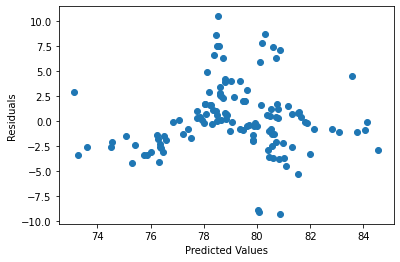

In [149]:
# Intialize and fit the linear regression model with standard PCA using 6 components.   
linReg = LinearRegression()
linReg.fit(X_train_pca, y_train)

# Make prediction and get performance measures for training data.
regPredTrain = linReg.predict(X_train_pca)
rSquaredTraining = metrics.r2_score(y_train, regPredTrain)
trainRSME = metrics.mean_squared_error(y_train, regPredTrain)**(1/2)

# Make prediction and get performance measures for validation data.
regPredVal = linReg.predict(X_test_pca)
rSquaredVal = metrics.r2_score(y_test, regPredVal)
valRSME = metrics.mean_squared_error(y_test, regPredVal)**(1/2)

# print results from preceding regression analysis.
print('The R\u00b2 on the training data is ' + str(round(rSquaredTraining, 2)) + '.')
print('The R\u00b2 on the validation data is ' + str(round(rSquaredVal, 2)) + '.')
print('The Root Mean Squared Error on the training data is ' + str(round(trainRSME, 2)) + '.')
print('The Root Mean Squared Error on the validation data is ' + str(round(valRSME, 2)) + '.')


plt.scatter(regPredVal, (y_test - regPredVal))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [150]:
#Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [151]:
# Create Class labels for life expectancy
medianLifeExp = df['Life expectancy '].median()
df3Classify['LifeExpClasses'] = np.where(df3['Life expectancy ']>(medianLifeExp), 'highLifeExp', 'lowLifeExp')

In [152]:
# Create data frames for life expectancy classification.
y_LifeExpDF = df3Classify['LifeExpClasses']
X_LifeExpDF = df3Classify.iloc[:,1:18]  # Does not include the life expectancy numeric column.

In [153]:
# Create data frames for country status classification.
y_CountryDF = df3Classify['Status_Developed']
X_CountryDF = df3Classify.iloc[:,0:18]  # Does include the life expectancy numeric column.

In [154]:
def runModelClassify(X, y, model): 
    """Prints results of classification model, including confusion matrix, and returns X and y data sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('The accuracy of the training set is: ', round(metrics.accuracy_score(y_true = y_train, y_pred = pred_train)*100,2))
    print('The accuracy of the testing set is: ', round(metrics.accuracy_score(y_true = y_test, y_pred = pred_test)*100,2))
    print('Difference: ', metrics.accuracy_score(y_true = y_train, y_pred = pred_train) - metrics.accuracy_score(y_true = y_test, y_pred = pred_test))
    print('The following results are for the testing set:')
    print(metrics.classification_report(y_test, pred_test))
    
    fig, ax = plt.subplots(figsize=(3,3))
    metrics.plot_confusion_matrix(mdl,X_test, y_test, ax=ax)
    plt.show()
    
    return X, y

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  96.6
Difference:  0.03401360544217691
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       614
           1       0.86      0.95      0.90       121

    accuracy                           0.97       735
   macro avg       0.92      0.96      0.94       735
weighted avg       0.97      0.97      0.97       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


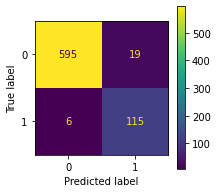

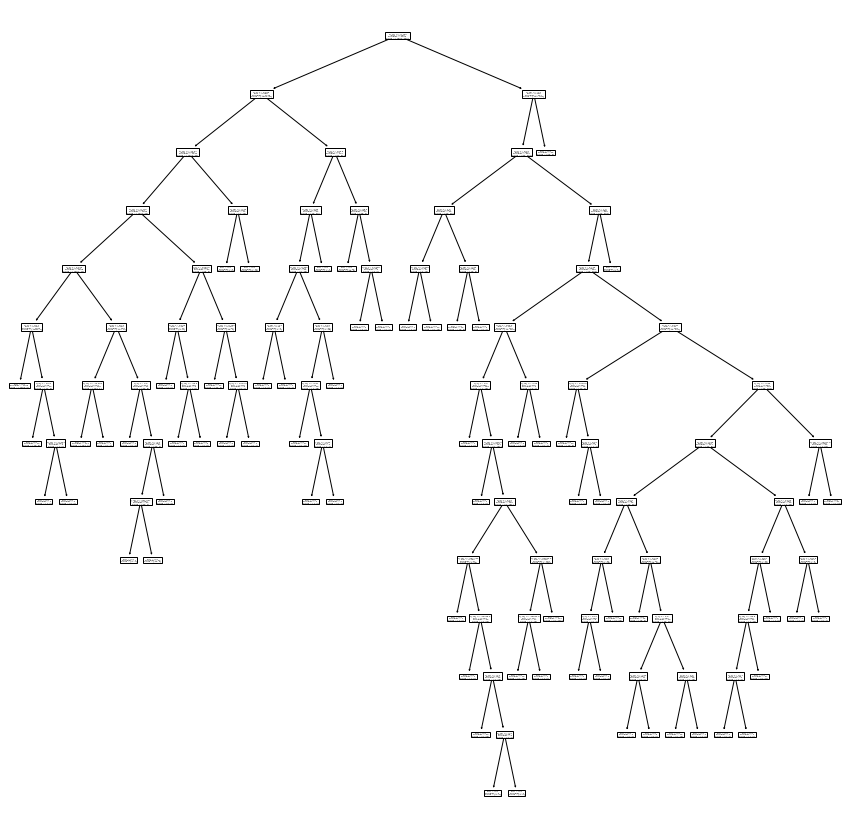

In [155]:
# Decision Tree classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, DecisionTreeClassifier())

X_train, X_test, y_train, y_test = train_test_split(X_CountryDF, y_CountryDF, test_size=0.25, random_state=55)
mdl = DecisionTreeClassifier()
mdl.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(mdl, ax = ax)
plt.show()


In [156]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['gini', 'entropy']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}


The accuracy of the training set is:  94.78
The accuracy of the testing set is:  93.33
Difference:  0.014465123316689366
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       614
           1       0.74      0.91      0.82       121

    accuracy                           0.93       735
   macro avg       0.86      0.92      0.89       735
weighted avg       0.94      0.93      0.94       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


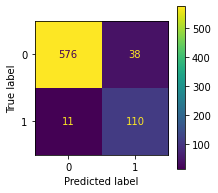

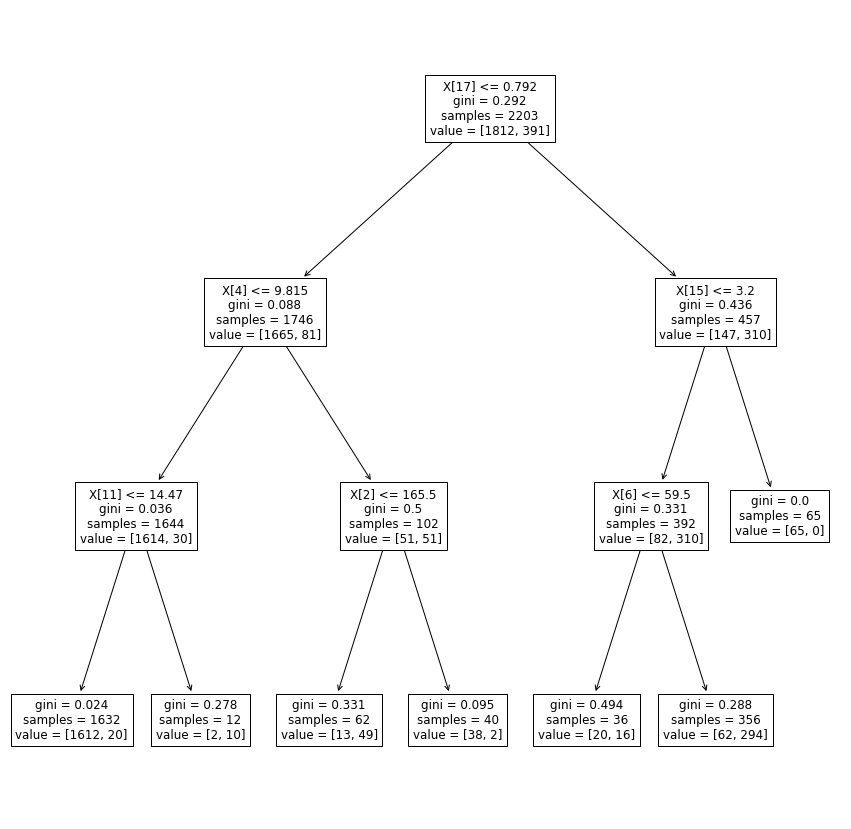

In [157]:
# Decision Tree classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, DecisionTreeClassifier(max_depth = 3, min_samples_split = 25))

X_train, X_test, y_train, y_test = train_test_split(X_CountryDF, y_CountryDF, test_size=0.25, random_state=55)
mdl = DecisionTreeClassifier(max_depth = 3, min_samples_split = 25)
mdl.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(mdl, ax = ax)
plt.show()

In [ ]:
#K Nearest Neighboors

In [158]:
# Scale Life Expectancy data frame
scaler = MinMaxScaler()
scaler.fit(X_LifeExpDF)
X_LifeExpMinMax = scaler.transform(X_LifeExpDF)

In [161]:
# Scale Country data frame
scaler = MinMaxScaler()
scaler.fit(X_CountryDF)
X_CountryMinMax = scaler.transform(X_CountryDF)

The accuracy of the training set is:  97.0
The accuracy of the testing set is:  95.78
Difference:  0.01221772413005151
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       614
           1       0.86      0.89      0.87       121

    accuracy                           0.96       735
   macro avg       0.92      0.93      0.92       735
weighted avg       0.96      0.96      0.96       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


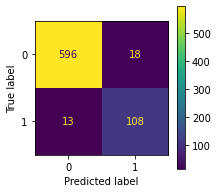

In [162]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 5))
print()

In [163]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
kvalues = np.arange(3,13,2)
weightsValues = ['uniform', 'distance']
gridDict = {'n_neighbors': kvalues, 'weights': weightsValues}
grid = GridSearchCV(KNeighborsClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryMinMax, y_CountryDF)
print(grid.best_params_) 

{'n_neighbors': 11, 'weights': 'distance'}


The accuracy of the training set is:  94.69
The accuracy of the testing set is:  94.15
Difference:  0.005394005082741238
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       614
           1       0.79      0.88      0.83       121

    accuracy                           0.94       735
   macro avg       0.88      0.92      0.90       735
weighted avg       0.94      0.94      0.94       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


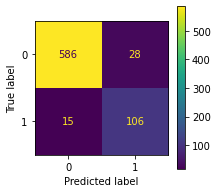

In [164]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 11, weights = 'uniform'))
print()

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  96.19
Difference:  0.03809523809523807
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       614
           1       0.88      0.88      0.88       121

    accuracy                           0.96       735
   macro avg       0.93      0.93      0.93       735
weighted avg       0.96      0.96      0.96       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


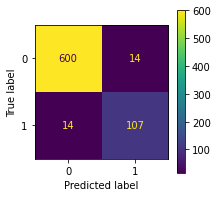

In [165]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 1, weights = 'distance'))
print()

In [166]:
#Random Forest

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  98.78
Difference:  0.01224489795918371
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.96      0.97      0.96       121

    accuracy                           0.99       735
   macro avg       0.98      0.98      0.98       735
weighted avg       0.99      0.99      0.99       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


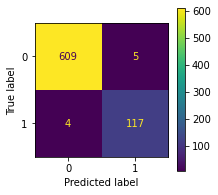

In [167]:
# Random Forest classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, RandomForestClassifier(random_state = 210))

In [168]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['gini', 'entropy']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(RandomForestClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 20}


The accuracy of the training set is:  96.41
The accuracy of the testing set is:  94.83
Difference:  0.015840489622994003
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       614
           1       0.80      0.91      0.85       121

    accuracy                           0.95       735
   macro avg       0.89      0.93      0.91       735
weighted avg       0.95      0.95      0.95       735



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


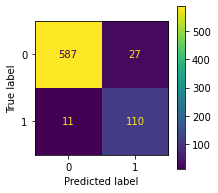

In [169]:
# Random Forest classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 15, random_state = 210))


In [ ]:
#Gradient Boosting Classifier
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing

learning_rate_values = np.linspace(.01, 1, 100)
n_estimators_values = np.arange(50, 300, 25)
param_grid = {'learning_rate': learning_rate_values, 'n_estimators': n_estimators_values}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=multiprocessing.cpu_count())
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 